In [1]:
# check if packages can be loaded, i.e. they are already installed
library(ISLR2) # for data sets
library(corrplot)
library(pROC)

corrplot 0.92 loaded

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




2 Classification

2.1 Using logistic regression in R

2.2 Classifier for Diabetes

In [2]:
#==============================================================================#
# R code template Classification exercise: Diabetes                            #
#==============================================================================#

# 00: packages -----------------------------------------------------------------
library(pROC)  # install package if necessary

# 01: load data ----------------------------------------------------------------
load("./Data/Diabetes.Rda")  # ??? stands for "path/Diabetes.Rda"

In [3]:
# 02: explorative data analysis ------------------------------------------------
# Answer parts (a) to (e) in the worksheet

# 03: modeling -----------------------------------------------------------------

# 03a: Train/Test Split ----
# Split the data into a train/test with 2000 observations in the test data set
set.seed(50)
n <- dim(Diabetes)[1]
testidx <- sample(n, 2000)
test <- Diabetes[testidx, ]
train <- Diabetes[-testidx, ]

table(train$YN)


  No  Yes 
7037  592 


Call:
glm(formula = YN ~ BMI, family = "binomial", data = train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.236903   0.169735  -30.85   <2e-16 ***
BMI          0.095288   0.005273   18.07   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4163.4  on 7628  degrees of freedom
Residual deviance: 3826.8  on 7627  degrees of freedom
AIC: 3830.8

Number of Fisher Scoring iterations: 5


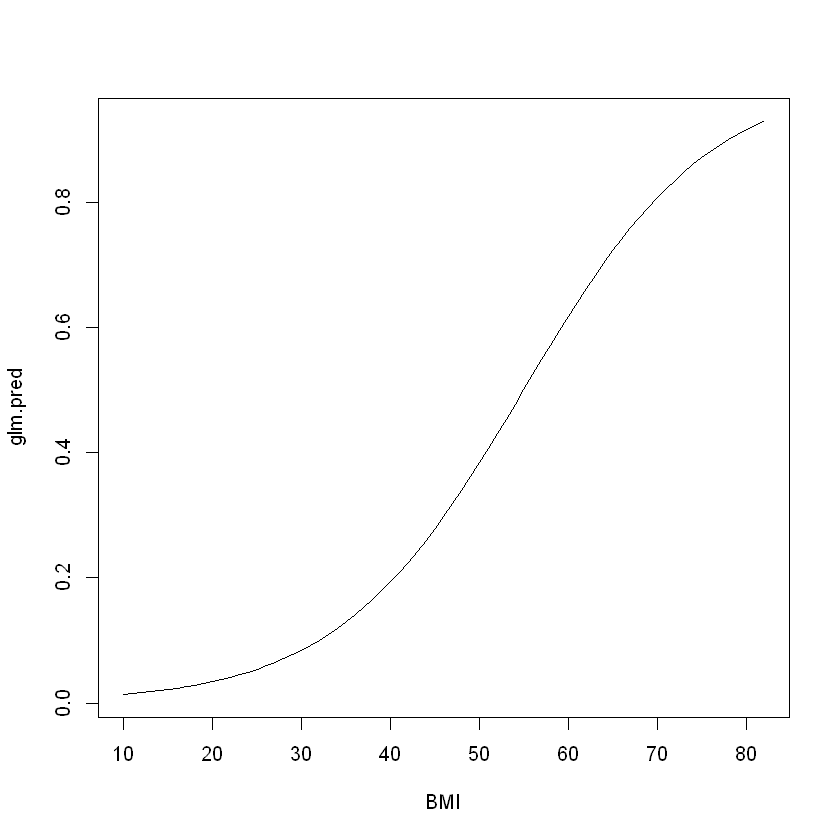

In [4]:
# 03b: model training ----
# Fit a logistic regression model and examine the model summary.
glm.obj <- glm(YN ~ BMI, data = train, family = "binomial")
summary(glm.obj)  #it looks as if higher BMI means diabetes is more likely  
BMI.grid <- 10:82
glm.pred <- predict(glm.obj, 
                    newdata = data.frame(BMI = BMI.grid), 
                    type="response")
plot(BMI.grid, glm.pred, type = "l", xlab="BMI")

In [5]:
# Question: does the logistic regression Diabetes = 'Yes' or Diabetes = 'No' as
#           dependent variable? 

# 04: Assessment of Classification Quality -------------------------------------

# 04a: Classification matrix ----

# Define "High Risk of Diabetes" using a cut off of alpha=0.5 and construct
# the classification matrix
alpha <- 0.5 
fit1 <- fitted(glm.obj)
HiRisk <- fit1 > alpha
table(HiRisk)
tab <- table(train$YN, HiRisk, dnn = c("observed", "predicted"))
print(tab)

# The following 3 commands calculate the sensitivity, specificity and accuracy.
# Which is which?
(tab[1, 1] + tab[2, 2])/sum(tab)
tab[1, 1]/sum(tab[1, ])
tab[2, 2]/sum(tab[2, ])

HiRisk
FALSE  TRUE 
 7604    25 

        predicted
observed FALSE TRUE
     No   7020   17
     Yes   584    8


[1] 0.9212217

[1] 0.9975842

[1] 0.01351351

Setting levels: control = No, case = Yes

Setting direction: controls < cases

You may need to call library(ggplot2) if you want to add layers, etc.

Loading required namespace: ggplot2



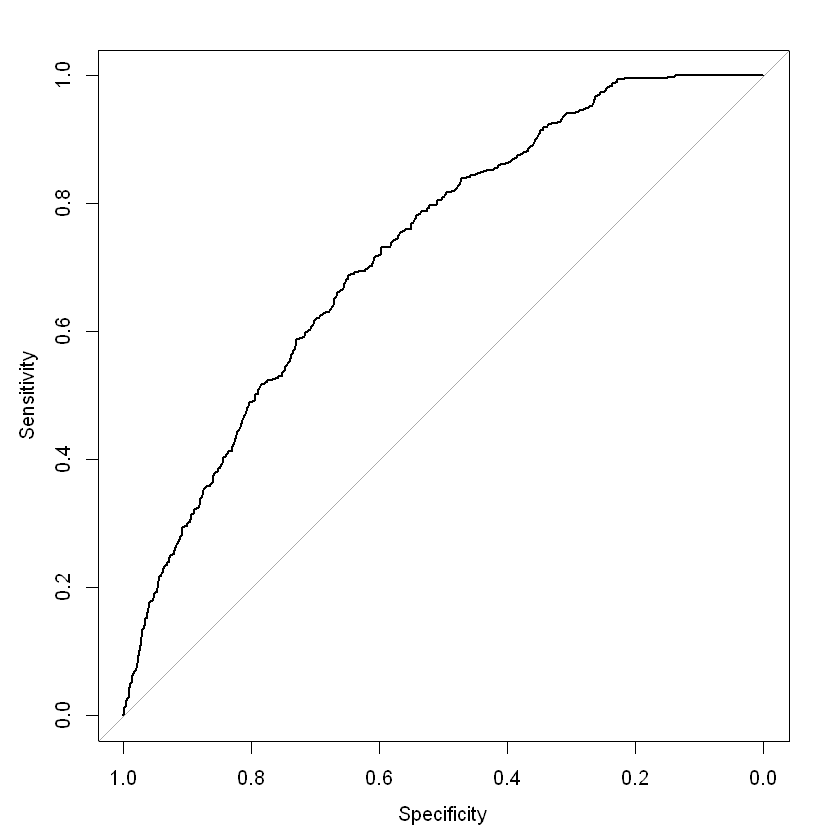

Area under the curve: 0.7281

[1] 1873

[1] 0.5002662

[1] 0.01351351

[1] 0.9975842

        predicted
observed FALSE TRUE
     No   1840    3
     Yes   155    2

Setting levels: control = No, case = Yes

Setting direction: controls < cases



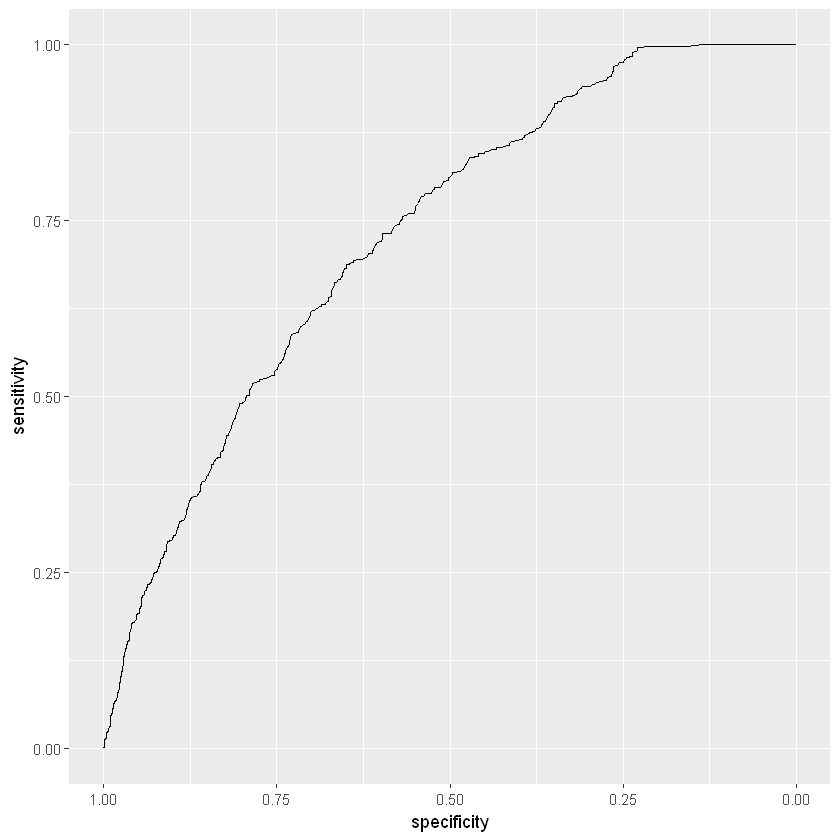

In [6]:
# 04b: ROC curve and AUC ----
roc.obj1  <-  roc(train$YN, fit1)
plot(roc.obj1)   # R base graphics
ggroc(roc.obj1)  # ggplot graphics
auc(roc.obj1)


# roc produces a vector of thresholds (alpha), specificities and sensitivities.
# find the index of the threshold nearest to alpha=0.5
alpha <- 0.5 
idx <- which.min(abs(roc.obj1$thresholds-alpha))
idx

roc.obj1$thresholds[idx]
roc.obj1$sensitivities[idx]
roc.obj1$specificities[idx]

# do these values concur (fit) with your answers above?

# 04c: out-of-sample goodness-of-fit -----
# get the predicted probabilities for the test data
ptest <-  predict(glm.obj, newdata = test, type = "response")

# confusion matrix for the test data
table(test$YN, ptest > alpha, dnn = c("observed", "predicted"))
test.roc.obj1  <-  roc(test$YN, ptest)

Area under the curve: 0.7488

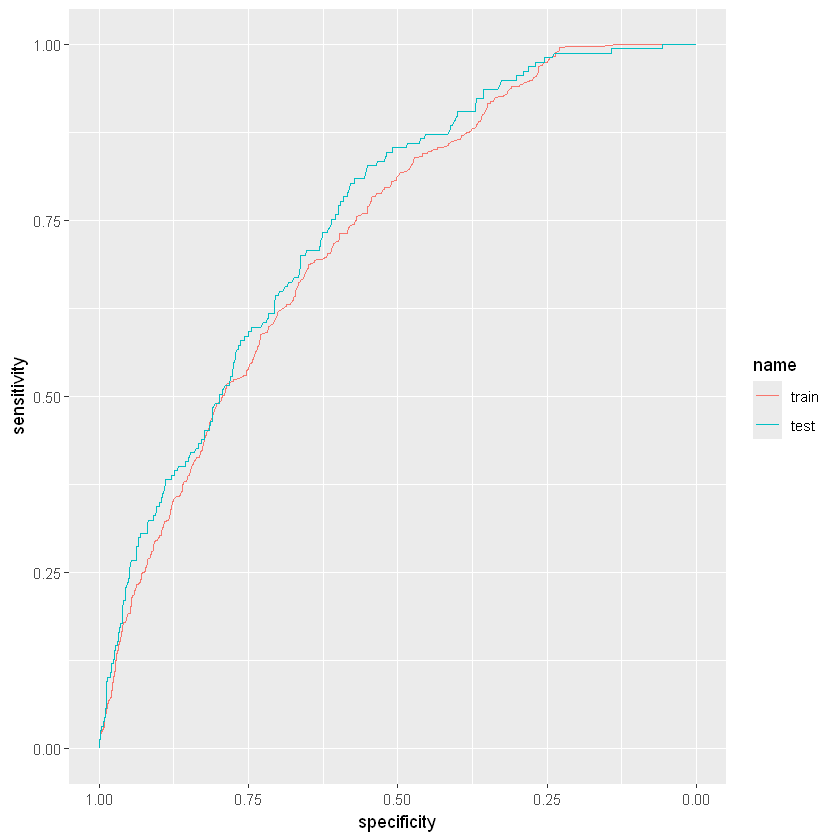

In [7]:
# ROC curve and AUC
ggroc(list(train=roc.obj1, test=test.roc.obj1))
auc(test.roc.obj1)


In [8]:
# the training and test results are similar

# 05: Further modeling ---------------------------------------------------------

# 05a: Repeat the analysis done so far with variable 'Age'
glm.obj2 <- glm(??? ~ ???, data=???, family=binomial)
glm.obj2$coefficients  # it looks as if older means diabetes is more likely  
ptest2 <-  predict(glm.obj2, newdata=test, type="response")
test.roc.obj2  <-  roc(???, ???)
ggroc(list("BMI"=test.roc.obj1, "Age"=test.roc.obj2))
auc(roc.obj2)

# 05b: repeat analyis with a model containing both BMI and Age 
glm.obj3 <- glm(???~???,data=???,family=binomial)

# Add further comments and code ....
# Have fun!






ERROR: Error in parse(text = x, srcfile = src): <text>:6:26: unexpected ','
5: # 05a: Repeat the analysis done so far with variable 'Age'
6: glm.obj2 <- glm(??? ~ ???,
                            ^
